# Guruji Assignment for Data Analyst Role

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
dataset1 = pd.read_excel("july-june.xlsx")
dataset2 = pd.read_excel("usersdata_for_assignment.xlsx")
dataset3 = pd.read_excel("rechargesfor_assignment.xlsx")

In [4]:
dataset1.head()

,OrderId,Uid,Gid,Fee,Share,Duration,Consultation Type,User Spend,Astro Earnings,Astro Status,...,Offer,Source,Disconnected By,User Device,Astro Device,IVR RefId,CallChannel,UserId,Guruji User,Guruji Astro
0,6681a444934e55a1513521cb,134451,13,35,0.5,8.233333,Call,288.166667,144.083333,completed,...,normal,Production,NaN,Mi 11X,realme narzo 30 5G,3140f301935c57b16485f8ddb7641871,Normal,"{""_id"":""6627fa0954833bfc4e0ce938"",""gurujiUser""...",False,True
1,6681a4bc934e55a15135d0c2,4408,97,45,0.5,5.016667,Call,180.600000,90.300000,completed,...,normal,Production,NaN,OPPO Reno11 5G,OPPO Reno6 5G,3ca27777898fb27aa0127b67dc0f1871,Normal,"{""_id"":""6504827c3e5a5cab16332d26"",""userDetails...",True,True
2,6681a4cf934e55a15135dea8,203234,106,30,0.5,8.000000,Call,184.000000,92.000000,completed,...,normal,Production,NaN,iPhone,OnePlus 10R 5G,c36013c6f53e9b37529550a1ed441871,Normal,"{""_id"":""6647633f866973511b87c413"",""gurujiUser""...",False,True
3,6681a537934e55a151361985,236230,431,18,0.4,3.833900,Chat,0.000000,0.000000,completed,...,first,Production,system,vivo Y75 5G,Redmi 12 5G,NaN,NaN,"{""_id"":""6681a50a934e55a15136018b"",""gurujiUser""...",False,True
4,6681a5ab934e55a1513666dc,236231,95,31,0.5,3.837383,Chat,0.000000,9.593458,completed,...,first,Production,system,OnePlus Nord CE 3 Lite 5G,Sanjeev's S21 FE,NaN,NaN,"{""_id"":""6681a52d934e55a15136150b"",""gurujiUser""...",False,True


In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52850 entries, 0 to 52849
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OrderId                  52850 non-null  object 
 1   Uid                      52850 non-null  int64  
 2   Gid                      52850 non-null  int64  
 3   Fee                      52850 non-null  int64  
 4   Share                    52850 non-null  float64
 5   Duration                 52850 non-null  float64
 6   Consultation Type        52850 non-null  object 
 7   User Spend               52850 non-null  float64
 8   Astro Earnings           52850 non-null  float64
 9   Astro Status             48031 non-null  object 
 10  User Status              37599 non-null  object 
 11  Status                   52847 non-null  object 
 12  Mode                     52312 non-null  object 
 13  UTC Date                 52850 non-null  object 
 14  IST Date              

In [6]:
dataset1.isnull().sum()

OrderId                        0
Uid                            0
Gid                            0
Fee                            0
Share                          0
Duration                       0
Consultation Type              0
User Spend                     0
Astro Earnings                 0
Astro Status                4819
User Status                15251
Status                         3
Mode                         538
UTC Date                       0
IST Date                    1668
Refund Status                  0
Feedback                   46747
goodFeedback               50668
badFeedback                51407
GuruId                         0
Is Whitelist                   0
User Duration                  0
Astro Duration                 0
Consultation Start Time    17748
Consultation End Time      10369
Offer                          0
Source                         0
Disconnected By            23494
User Device                 2005
Astro Device                2005
IVR RefId 

In [7]:
dataset1.dropna(how='all', inplace=True)

In [8]:
dataset1[dataset1["Mode"]==""]

,OrderId,Uid,Gid,Fee,Share,Duration,Consultation Type,User Spend,Astro Earnings,Astro Status,...,Offer,Source,Disconnected By,User Device,Astro Device,IVR RefId,CallChannel,UserId,Guruji User,Guruji Astro


In [9]:
dataset1['Astro Status'] = dataset1['Astro Status'].astype('category')
dataset1['User Status'] = dataset1['User Status'].astype('category')
dataset1['Status'] = dataset1['Status'].astype('category')
dataset1['Offer'] = dataset1['Offer'].astype('category')

In [10]:
dataset1.dtypes

OrderId                      object
Uid                           int64
Gid                           int64
Fee                           int64
Share                       float64
Duration                    float64
Consultation Type            object
User Spend                  float64
Astro Earnings              float64
Astro Status               category
User Status                category
Status                     category
Mode                         object
UTC Date                     object
IST Date                     object
Refund Status                object
Feedback                    float64
goodFeedback                 object
badFeedback                  object
GuruId                       object
Is Whitelist                   bool
User Duration                 int64
Astro Duration                int64
Consultation Start Time      object
Consultation End Time        object
Offer                      category
Source                       object
Disconnected By             

In [11]:
dataset1['UTC Date'] = pd.to_datetime(dataset1['UTC Date'], errors='coerce')
dataset1['IST Date'] = pd.to_datetime(dataset1['IST Date'], errors='coerce')
dataset1['Consultation Start Time'] = pd.to_datetime(dataset1['Consultation Start Time'], errors='coerce')
dataset1['Consultation End Time'] = pd.to_datetime(dataset1['Consultation End Time'], errors='coerce')

In [12]:
dataset1.dtypes

OrderId                                 object
Uid                                      int64
Gid                                      int64
Fee                                      int64
Share                                  float64
Duration                               float64
Consultation Type                       object
User Spend                             float64
Astro Earnings                         float64
Astro Status                          category
User Status                           category
Status                                category
Mode                                    object
UTC Date                   datetime64[ns, UTC]
IST Date                   datetime64[ns, UTC]
Refund Status                           object
Feedback                               float64
goodFeedback                            object
badFeedback                             object
GuruId                                  object
Is Whitelist                              bool
User Duration

In [13]:
dataset2.head()

,wallet,isInternational,consultationCount,website,totalRecharge,chatConsultationCount,totalRechargeAmount,createdAt,_id,uid,role,gurujiUser,ISTDate
0,0.0,0.0,0,"[""app""]",0,0,0.00,2024-08-17T18:21:19.188Z,66c0ea1f0c7600d494a2c8f7,277766.0,user,1.0,2024-08-17T23:51:19.188Z
1,160.0,0.0,2,"[""iOS""]",2,0,89.68,2024-08-17T18:05:50.878Z,66c0e67e0c7600d494a1a3fd,277765.0,user,0.0,2024-08-17T23:35:50.878Z
2,0.0,0.0,0,"[""app""]",0,1,0.00,2024-08-17T17:53:14.593Z,66c0e38a0c7600d494a122ba,277764.0,user,0.0,2024-08-17T23:23:14.593Z
3,0.0,0.0,0,"[""app""]",0,0,0.00,2024-08-17T17:49:44.793Z,66c0e2b80c7600d494a0f9c5,277763.0,user,1.0,2024-08-17T23:19:44.793Z
4,0.0,0.0,0,"[""app""]",0,0,0.00,2024-08-17T17:12:06.793Z,66c0d9e60c7600d4949d6671,277762.0,user,1.0,2024-08-17T22:42:06.793Z


In [14]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83256 entries, 0 to 83255
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wallet                 83256 non-null  float64
 1   isInternational        83254 non-null  float64
 2   consultationCount      83256 non-null  int64  
 3   website                83256 non-null  object 
 4   totalRecharge          83256 non-null  int64  
 5   chatConsultationCount  83256 non-null  int64  
 6   totalRechargeAmount    83256 non-null  float64
 7   createdAt              83256 non-null  object 
 8   _id                    83256 non-null  object 
 9   uid                    83255 non-null  float64
 10  role                   83255 non-null  object 
 11  gurujiUser             83255 non-null  float64
 12  ISTDate                83256 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usage: 8.3+ MB


In [15]:
dataset3.head()

,_id,Uid,Order Id,Status,Amount,Gst,UTC Time,gurujiUser,Gateway,Mode,totalAmount,ISTDate
0,665a173b9efc2e9fa90ab8c3,209937,order_OHCTwUL5S4z9kY,captured,100.0,18.0,2024-05-31T18:30:19.083Z,0.0,Razorpay,app,118.0,2024-06-01T00:00:19.083Z
1,665a179c9efc2e9fa90af52a,119321,order_OHCVex44YhZDba,captured,100.0,18.0,2024-05-31T18:31:56.624Z,1.0,Razorpay,ios,118.0,2024-06-01T00:01:56.624Z
2,665a18099efc2e9fa90b46b6,119321,order_OHCXZM6fCvpYVu,captured,920.0,144.0,2024-05-31T18:33:45.091Z,1.0,Razorpay,ios,1064.0,2024-06-01T00:03:45.091Z
3,665a1a1d9efc2e9fa90cd84c,212656,order_OHCgwQVPGVdZfj,captured,200.0,36.0,2024-05-31T18:42:37.431Z,0.0,Razorpay,app,236.0,2024-06-01T00:12:37.431Z
4,665a1c599efc2e9fa90e4592,209937,order_OHCr0nTyLd2re5,captured,100.0,18.0,2024-05-31T18:52:09.436Z,0.0,Razorpay,app,118.0,2024-06-01T00:22:09.436Z


In [16]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13515 entries, 0 to 13514
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id          13515 non-null  object 
 1   Uid          13515 non-null  int64  
 2   Order Id     13515 non-null  object 
 3   Status       13515 non-null  object 
 4   Amount       12565 non-null  float64
 5   Gst          13515 non-null  float64
 6   UTC Time     13515 non-null  object 
 7   gurujiUser   12900 non-null  float64
 8   Gateway      12900 non-null  object 
 9   Mode         13353 non-null  object 
 10  totalAmount  12301 non-null  float64
 11  ISTDate      13515 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.2+ MB


In [17]:
# Handle missing values by reviewing counts and determining next steps
users_missing = dataset2.isnull().sum()
recharges_missing = dataset3.isnull().sum()
print("usermissing:",users_missing)
print("--------------------------------")
print("rechargemissing",recharges_missing)

usermissing: wallet                   0
isInternational          2
consultationCount        0
website                  0
totalRecharge            0
chatConsultationCount    0
totalRechargeAmount      0
createdAt                0
_id                      0
uid                      1
role                     1
gurujiUser               1
ISTDate                  0
dtype: int64
--------------------------------
rechargemissing _id               0
Uid               0
Order Id          0
Status            0
Amount          950
Gst               0
UTC Time          0
gurujiUser      615
Gateway         615
Mode            162
totalAmount    1214
ISTDate           0
dtype: int64


In [18]:
# Convert columns to appropriate data types
dataset2['createdAt'] = pd.to_datetime(dataset2['createdAt'], errors='coerce')
dataset2['ISTDate'] = pd.to_datetime(dataset2['ISTDate'], errors='coerce')
dataset2['isInternational'] = dataset2['isInternational'].astype('category')
dataset2['role'] = dataset2['role'].astype('category')
dataset2['gurujiUser'] = dataset2['gurujiUser'].astype('category')

dataset3['UTC Time'] = pd.to_datetime(dataset3['UTC Time'], errors='coerce')
dataset3['ISTDate'] = pd.to_datetime(dataset3['ISTDate'], errors='coerce')
dataset3['Status'] = dataset3['Status'].astype('category')
dataset3['Mode'] = dataset3['Mode'].astype('category')
dataset3['Gateway'] = dataset3['Gateway'].astype('category')

In [19]:
dataset2.dtypes

wallet                               float64
isInternational                     category
consultationCount                      int64
website                               object
totalRecharge                          int64
chatConsultationCount                  int64
totalRechargeAmount                  float64
createdAt                datetime64[ns, UTC]
_id                                   object
uid                                  float64
role                                category
gurujiUser                          category
ISTDate                  datetime64[ns, UTC]
dtype: object

In [20]:
dataset3.dtypes

_id                         object
Uid                          int64
Order Id                    object
Status                    category
Amount                     float64
Gst                        float64
UTC Time       datetime64[ns, UTC]
gurujiUser                 float64
Gateway                   category
Mode                      category
totalAmount                float64
ISTDate        datetime64[ns, UTC]
dtype: object

In [21]:
# Check for duplicates and remove them based on key columns
users_duplicates_removed = dataset2.drop_duplicates()
recharges_duplicates_removed = dataset3.drop_duplicates()


In [22]:
print(users_duplicates_removed)

       wallet isInternational  consultationCount  website  totalRecharge  \
0         0.0             0.0                  0  ["app"]              0   
1       160.0             0.0                  2  ["iOS"]              2   
2         0.0             0.0                  0  ["app"]              0   
3         0.0             0.0                  0  ["app"]              0   
4         0.0             0.0                  0  ["app"]              0   
...       ...             ...                ...      ...            ...   
83251     0.0             0.0                  0  ["app"]              0   
83252     0.0             0.0                  0  ["app"]              0   
83253     0.0             0.0                  0  ["app"]              0   
83254     0.0             0.0                  0  ["app"]              0   
83255     0.0             0.0                  0  ["app"]              0   

       chatConsultationCount  totalRechargeAmount  \
0                          0      

In [23]:
print(recharges_duplicates_removed)

                            _id     Uid              Order Id    Status  \
0      665a173b9efc2e9fa90ab8c3  209937  order_OHCTwUL5S4z9kY  captured   
1      665a179c9efc2e9fa90af52a  119321  order_OHCVex44YhZDba  captured   
2      665a18099efc2e9fa90b46b6  119321  order_OHCXZM6fCvpYVu  captured   
3      665a1a1d9efc2e9fa90cd84c  212656  order_OHCgwQVPGVdZfj  captured   
4      665a1c599efc2e9fa90e4592  209937  order_OHCr0nTyLd2re5  captured   
...                         ...     ...                   ...       ...   
13510  66b7ad751cb75483188e010f  210632  order_OjI6FPU4bfDrs6  captured   
13511  66b7ae9b1cb75483188e8bab  273098  order_OjIBQ5C48ANA5O  captured   
13512  66b7af191cb75483188ec652  195694  order_OjIDdpO991sxo5  captured   
13513  66b7af271cb75483188ec74a  133325  order_OjIDsbmB2bHo0Q  captured   
13514  66b7b1821cb75483188fcec3   89623  order_OjIOUqBARQAF7b  captured   

       Amount     Gst                         UTC Time  gurujiUser   Gateway  \
0       100.0   18.

In [24]:
# Verify data types and missing values post processing
users_data_info_post = users_duplicates_removed.info(), users_duplicates_removed.isnull().sum()
recharges_data_info_post = recharges_duplicates_removed.info(), recharges_duplicates_removed.isnull().sum()

users_data_info_post, recharges_data_info_post

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83256 entries, 0 to 83255
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   wallet                 83256 non-null  float64            
 1   isInternational        83254 non-null  category           
 2   consultationCount      83256 non-null  int64              
 3   website                83256 non-null  object             
 4   totalRecharge          83256 non-null  int64              
 5   chatConsultationCount  83256 non-null  int64              
 6   totalRechargeAmount    83256 non-null  float64            
 7   createdAt              83256 non-null  datetime64[ns, UTC]
 8   _id                    83256 non-null  object             
 9   uid                    83255 non-null  float64            
 10  role                   83255 non-null  category           
 11  gurujiUser             83255 non-null  category       

((None,
  wallet                   0
  isInternational          2
  consultationCount        0
  website                  0
  totalRecharge            0
  chatConsultationCount    0
  totalRechargeAmount      0
  createdAt                0
  _id                      0
  uid                      1
  role                     1
  gurujiUser               1
  ISTDate                  0
  dtype: int64),
 (None,
  _id               0
  Uid               0
  Order Id          0
  Status            0
  Amount          950
  Gst               0
  UTC Time          0
  gurujiUser      615
  Gateway         615
  Mode            162
  totalAmount    1214
  ISTDate           0
  dtype: int64))

C:\Users\tusha\AppData\Local\Temp\ipykernel_6700\1431469641.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
C:\Users\tusha\AppData\Local\Temp\ipykernel_6700\1431469641.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
C:\Users\tusha\AppData\Local\Temp\ipykernel_6700\1431469641.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
C:\Users\tusha\AppData\Local\Temp\ipykernel_6700\1431469641.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
C:\Users\tusha\AppDa

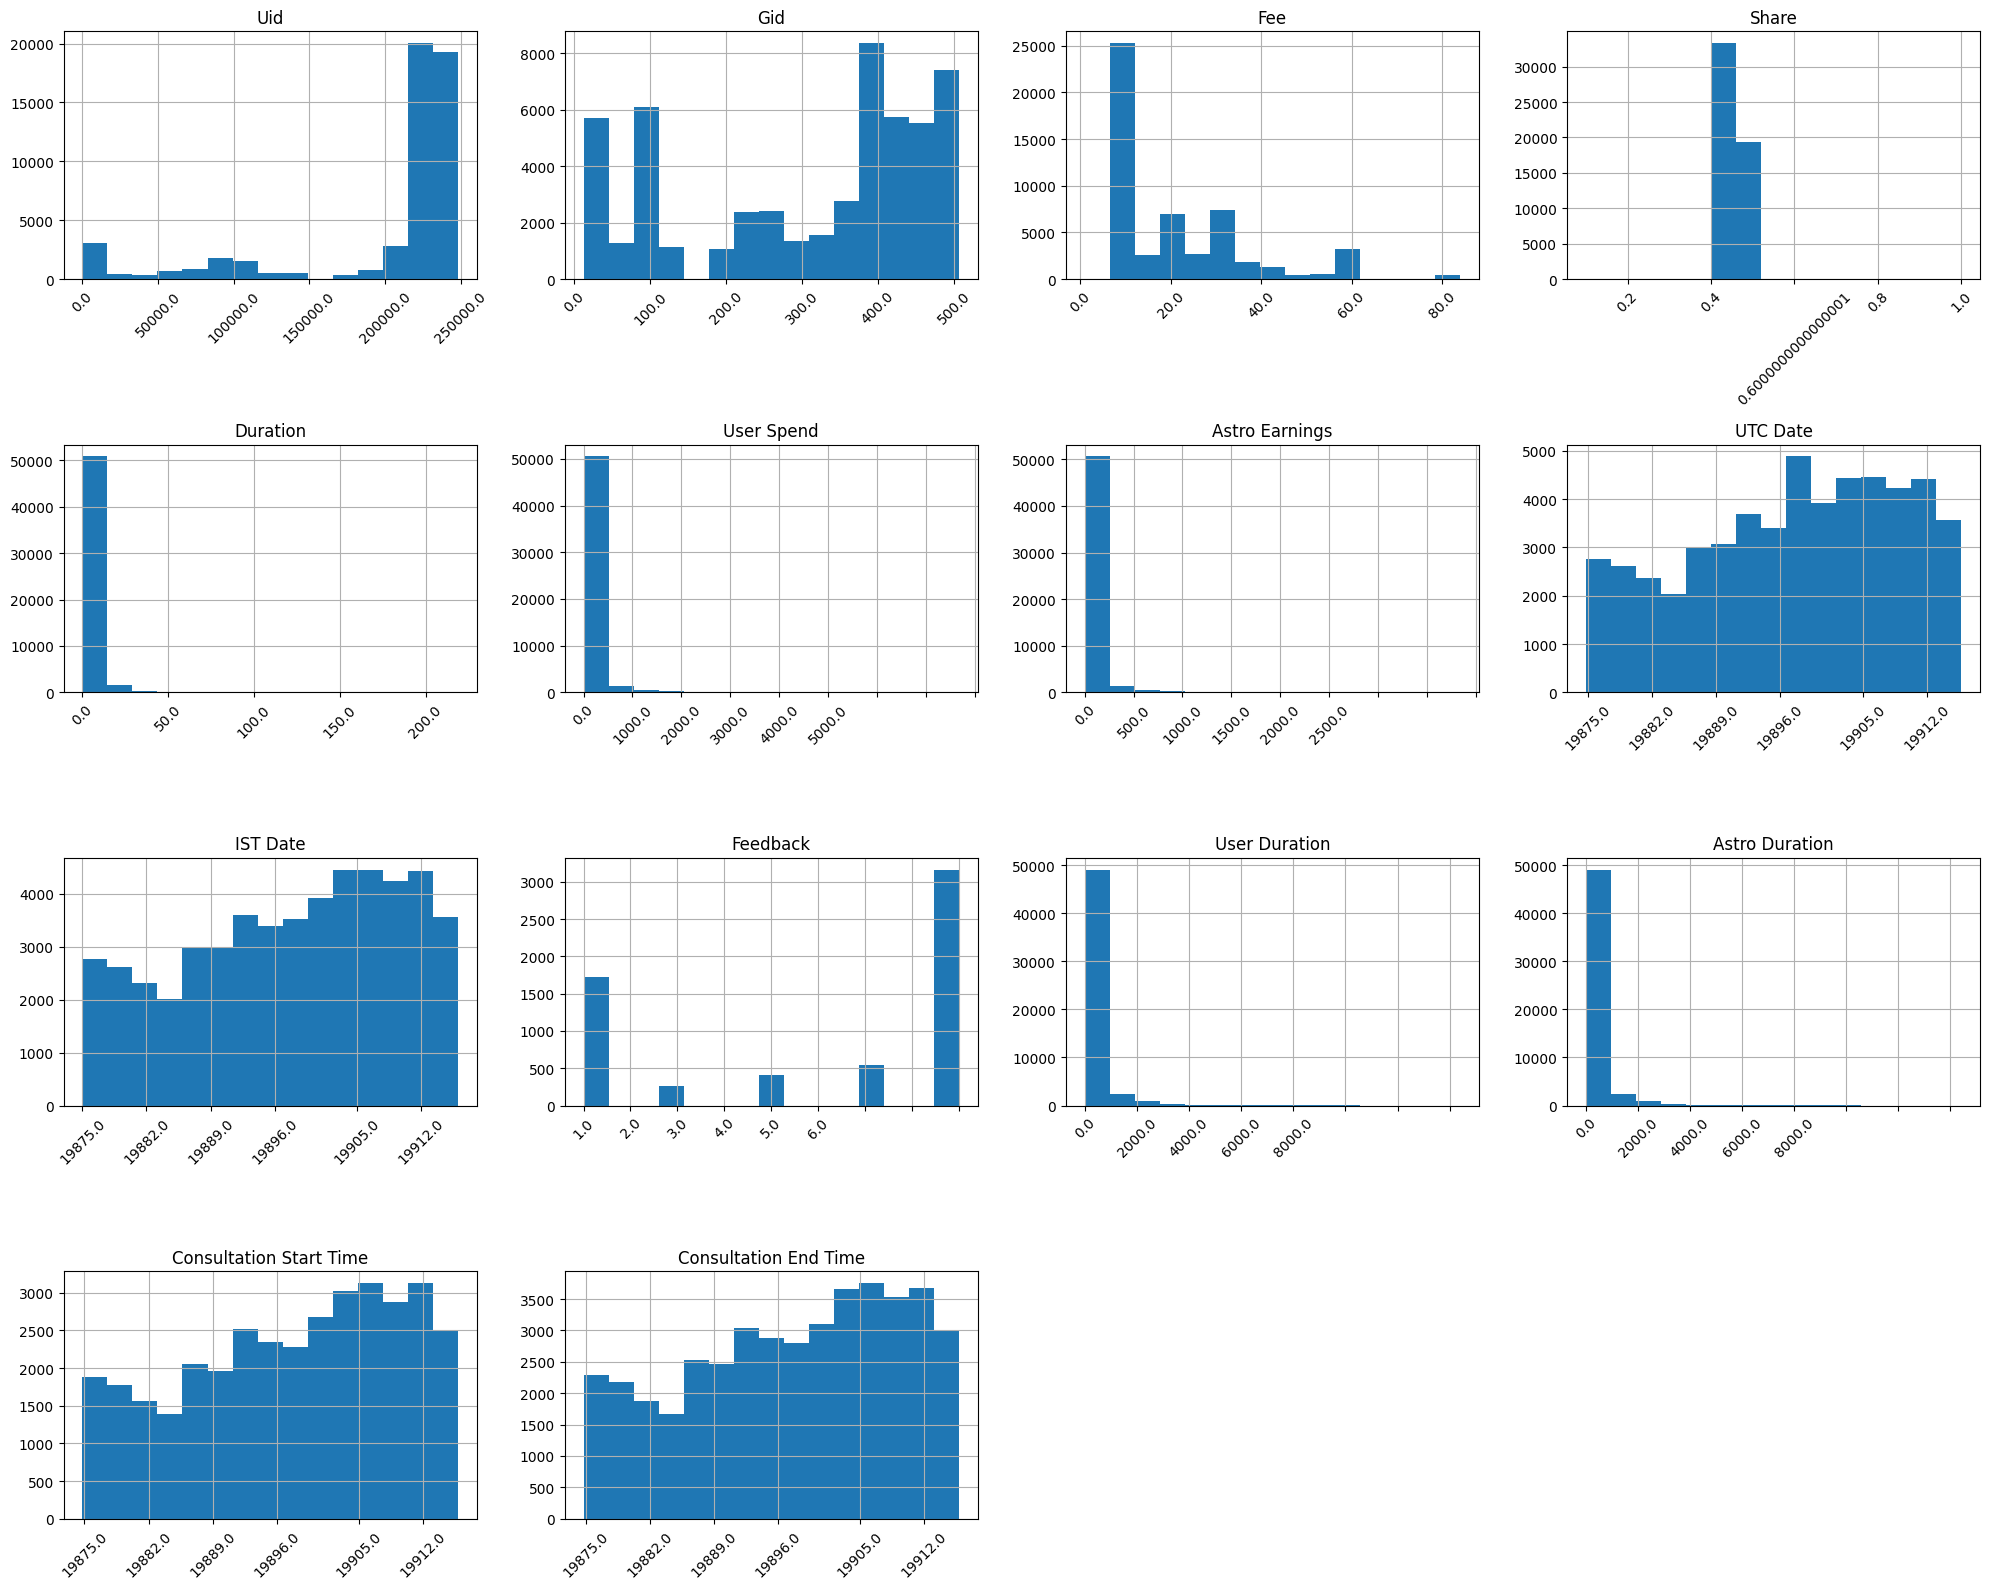

In [25]:
# Plot histogram for numeric columns
fig = dataset1.hist(bins=15, figsize=(20, 16))
# Rotate x-axis labels
for ax in fig.flatten():
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
plt.tight_layout()
plt.show()

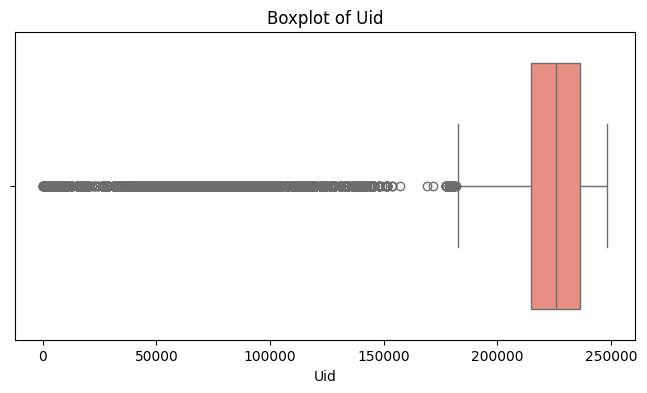

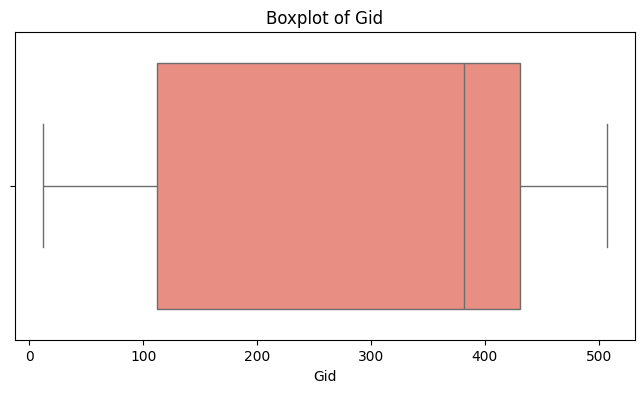

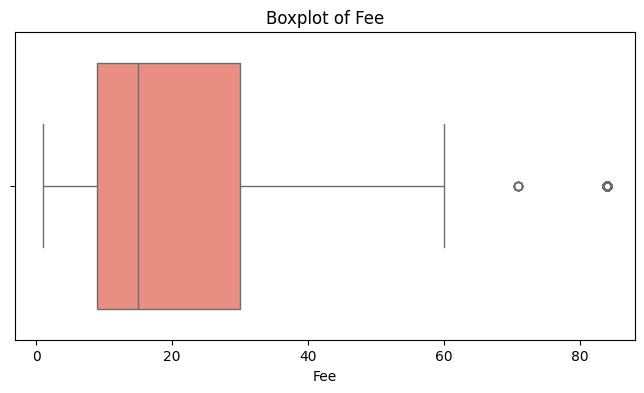

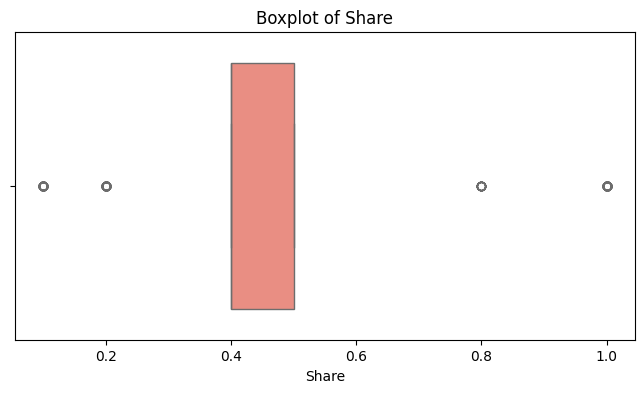

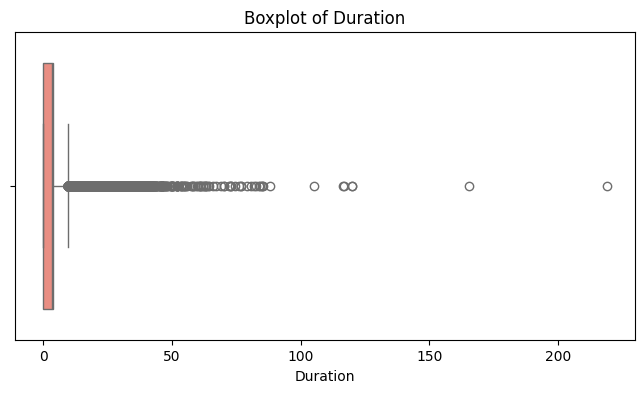

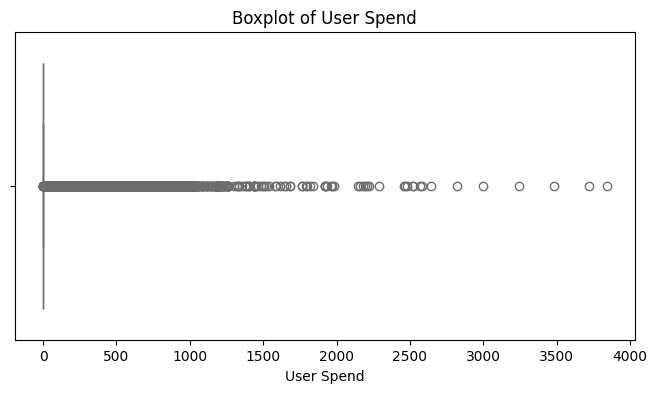

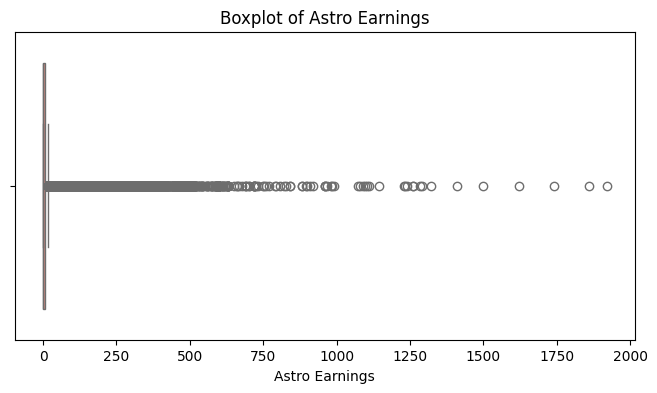

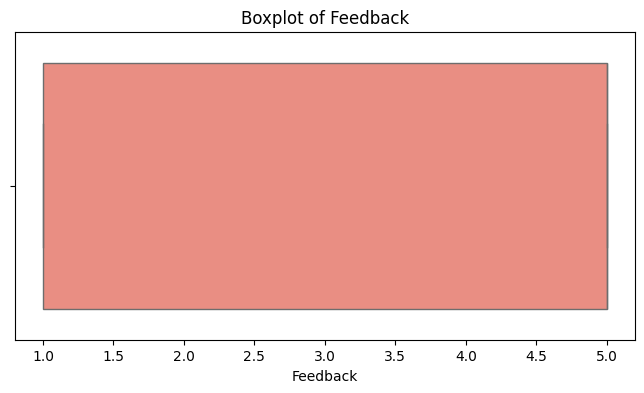

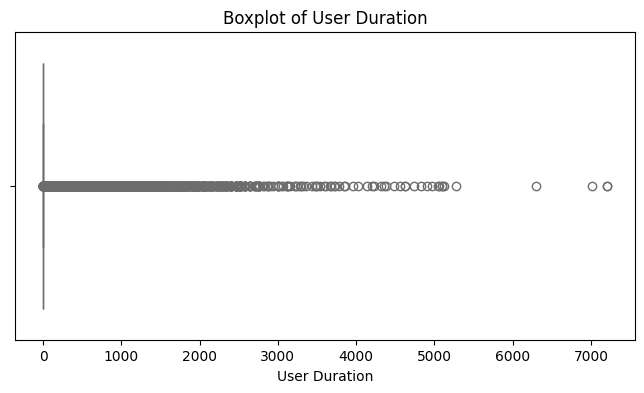

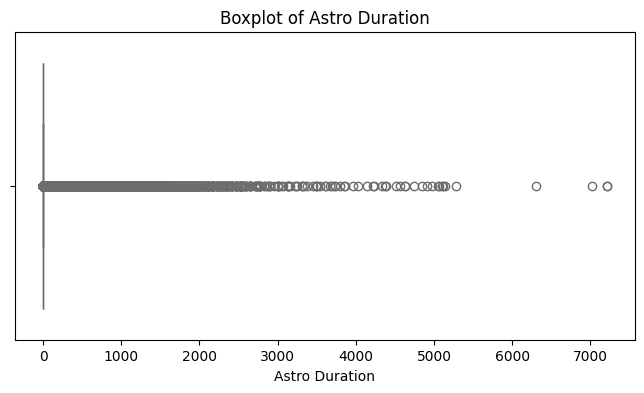

In [26]:
# Boxplot for checking outliers
columns = dataset1.select_dtypes(include='number').columns  # Select only numerical columns

# Plotting each column separately
for col in columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset1[col], color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


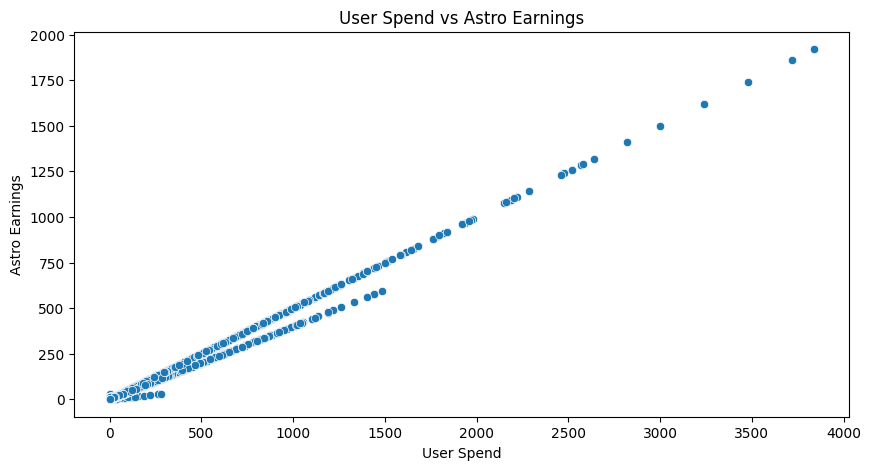

In [27]:
# Scatter plot for specific relationship (e.g., user Spend vs. Astro Earnings)
plt.figure(figsize=(10, 5))
sns.scatterplot(x='User Spend', y='Astro Earnings', data=dataset1)
plt.title('User Spend vs Astro Earnings')
plt.show()


*The Conclusion can made from the scatter plot is that High spend on Guruji app make high earning of Astrologer*

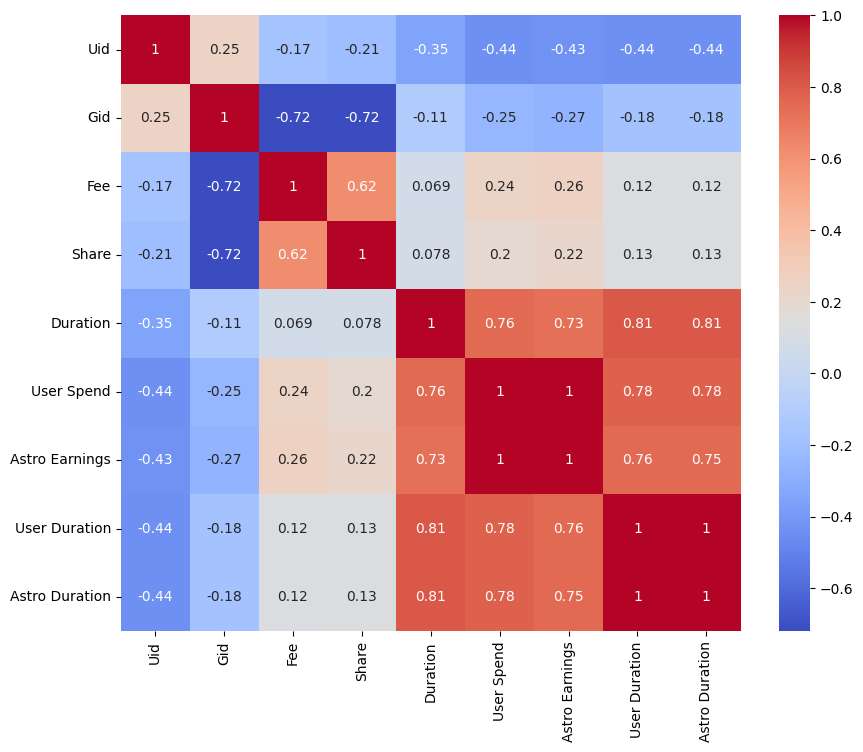

In [28]:
# Correlation matrix
new_data = dataset1[["Uid","Gid","Fee","Share","Duration","User Spend","Astro Earnings","User Duration","Astro Duration"]]
correlation = new_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

*From the above correlation two conclusion can be made.*

1. More the user spend on the guruji app higher will be the Astro Earning
2. If the user want to spend more time on the app then the price to talk to the guruji will be lower.
3. On sharing the app with friends the user will get a discount on the price to talk to the guruji.

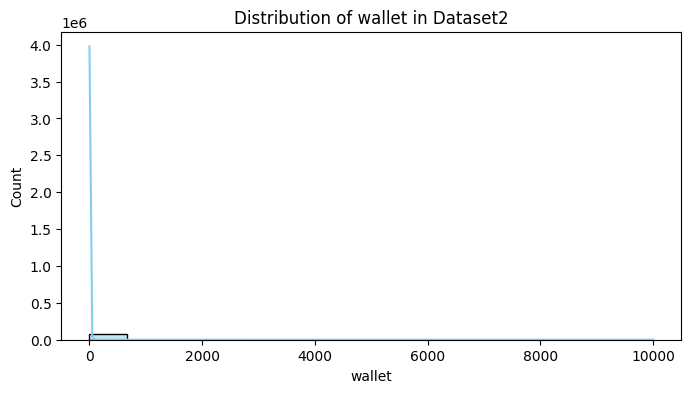

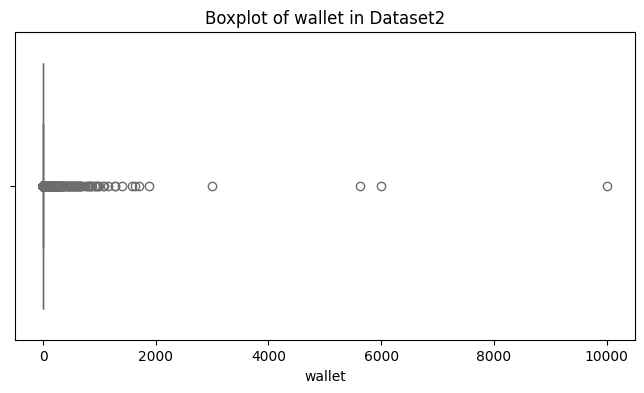

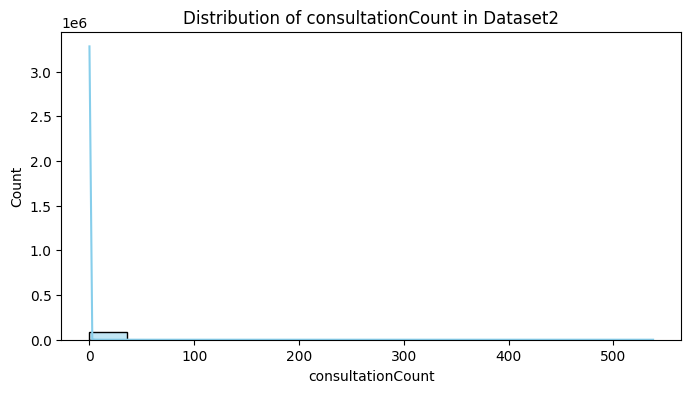

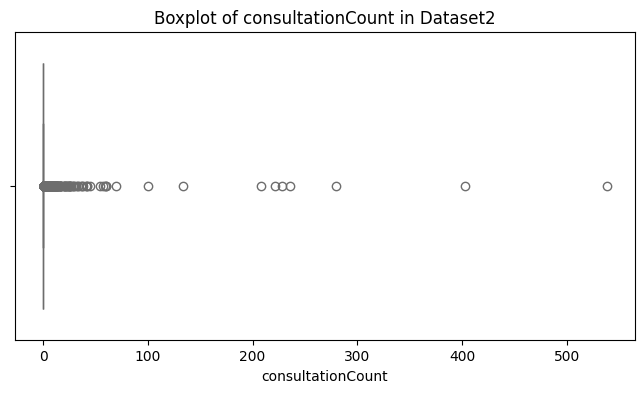

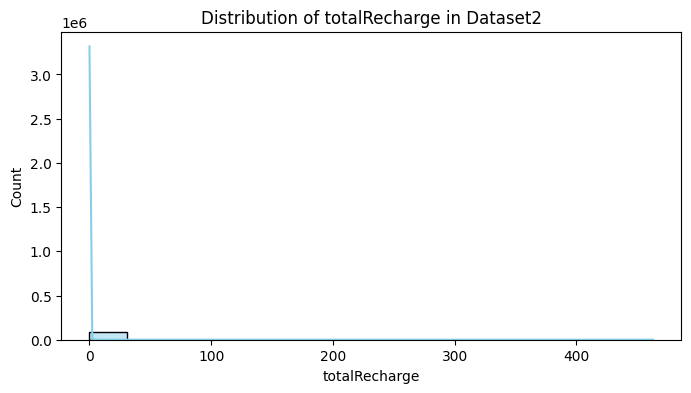

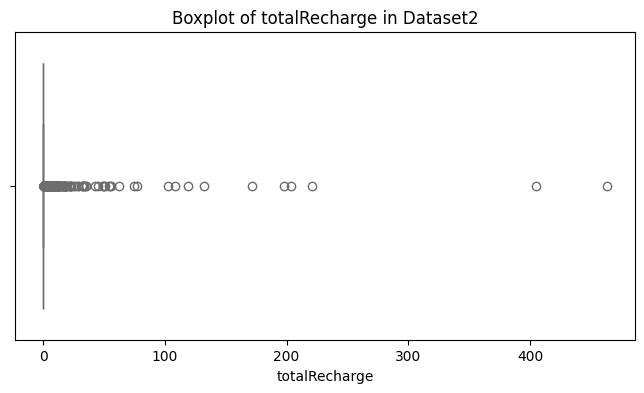

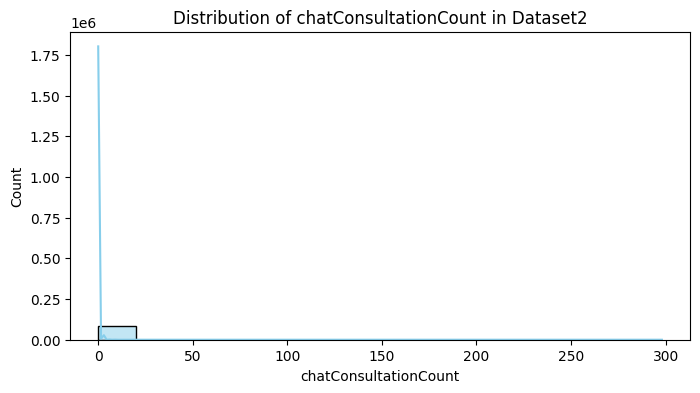

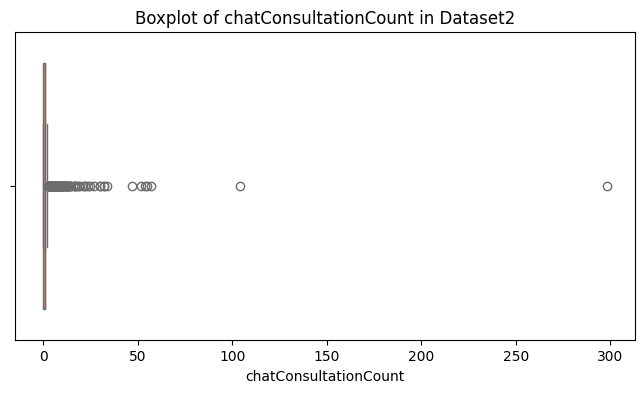

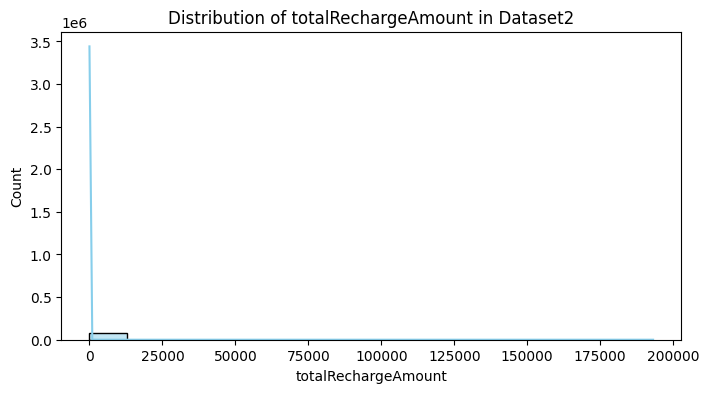

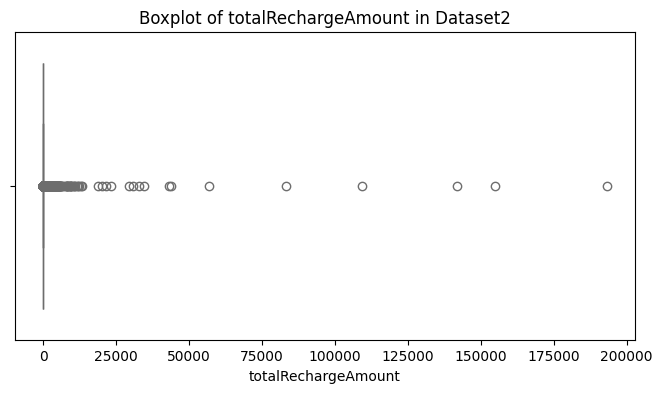

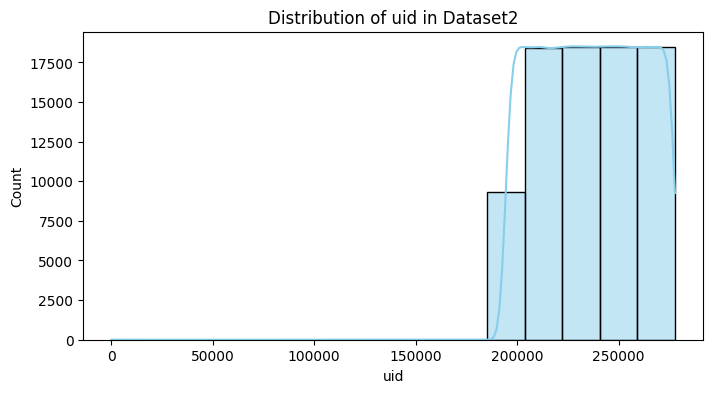

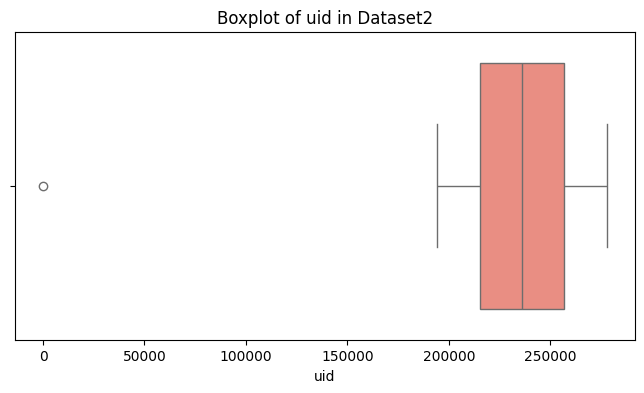

In [29]:
# Univariate Analysis for dataset2
numeric_columns2 = dataset2.select_dtypes(include='number').columns

for col in numeric_columns2:
    # Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset2[col], bins=15, kde=True, color='skyblue')
    plt.title(f'Distribution of {col} in Dataset2')
    plt.xlabel(col)
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset2[col], color='salmon')
    plt.title(f'Boxplot of {col} in Dataset2')
    plt.xlabel(col)
    plt.show()



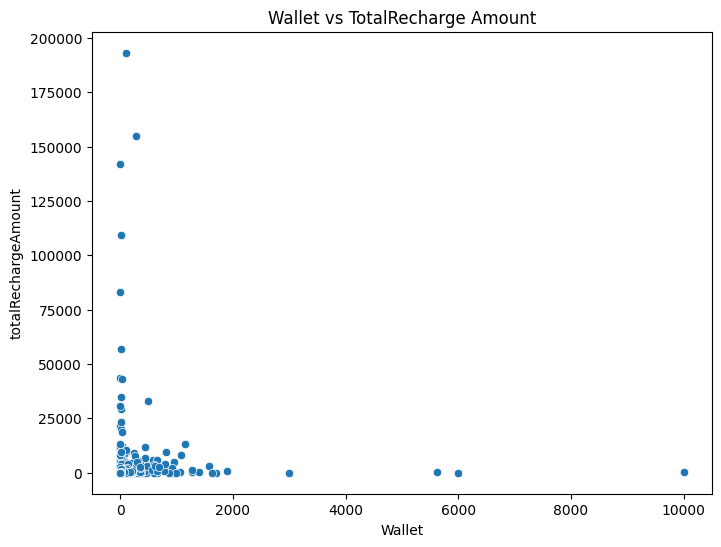

Correlation between Wallet and totalRechargeAmount is:
                        wallet  totalRechargeAmount
wallet               1.000000             0.041316
totalRechargeAmount  0.041316             1.000000


In [30]:
# Bivariate Analysis for dataset2
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset2, x='wallet', y='totalRechargeAmount')
plt.title('Wallet vs TotalRecharge Amount')
plt.xlabel('Wallet')
plt.ylabel('totalRechargeAmount')
plt.show()
    
# Correlation calculation
correlation2 = dataset2[['wallet', 'totalRechargeAmount']].corr()
print("Correlation between Wallet and totalRechargeAmount is:\n", correlation2)


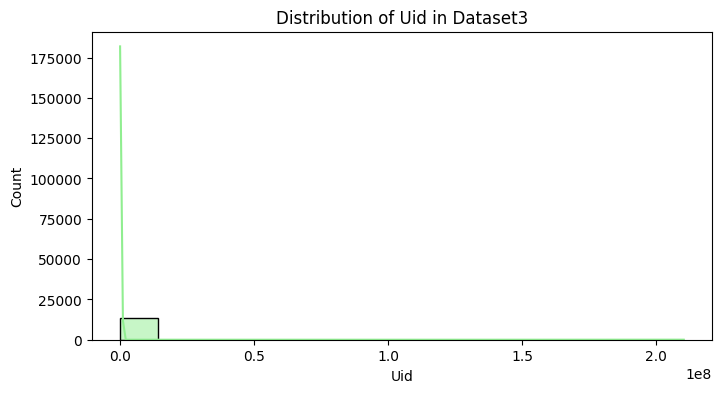

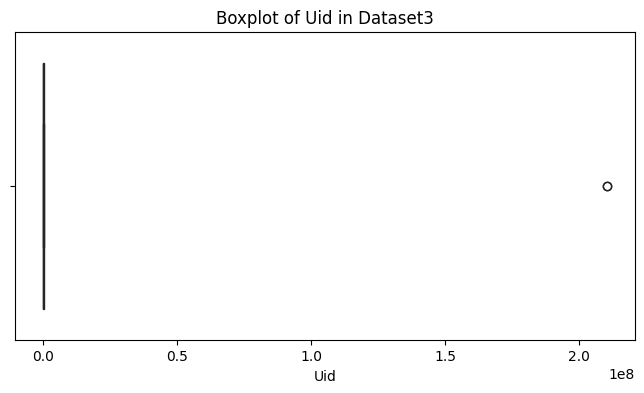

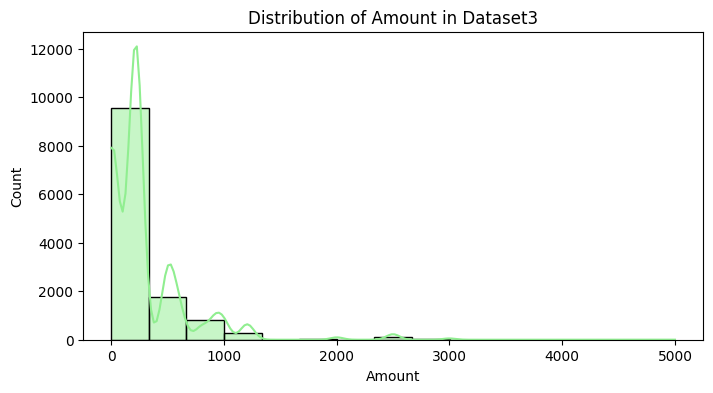

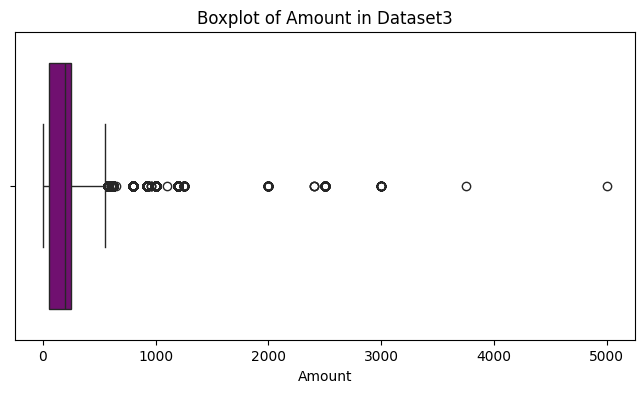

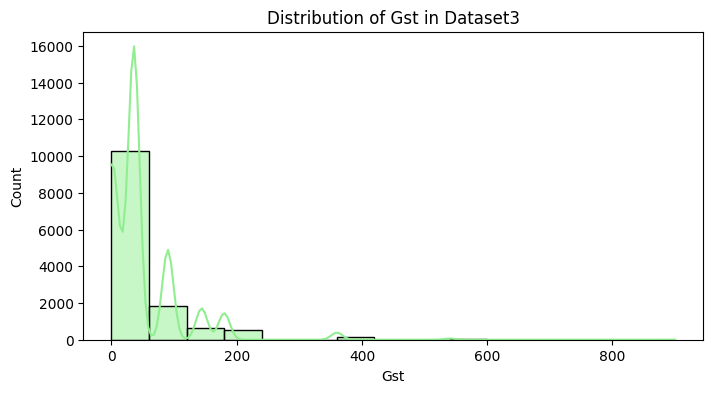

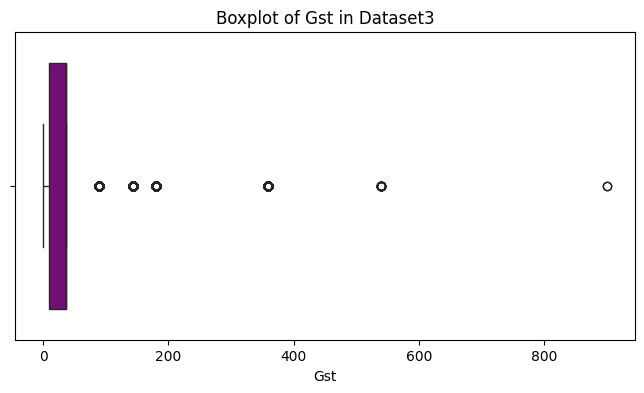

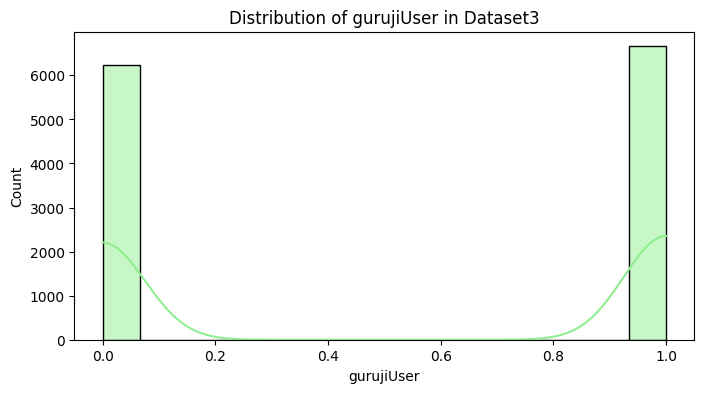

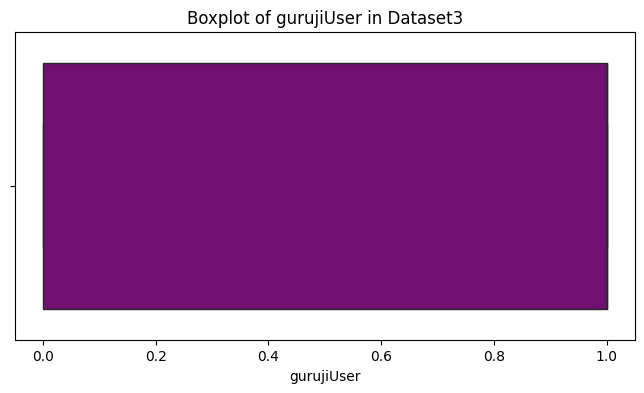

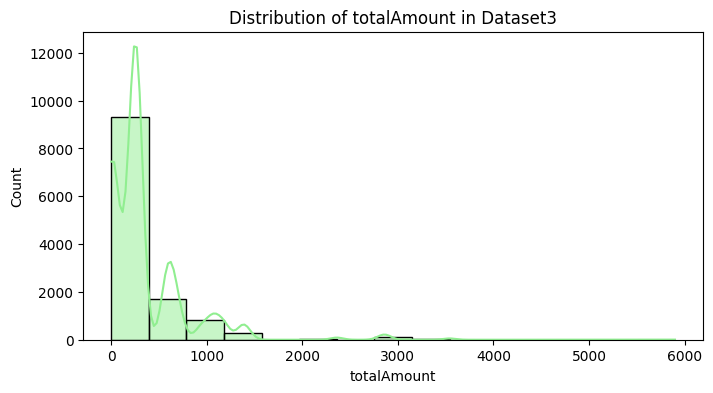

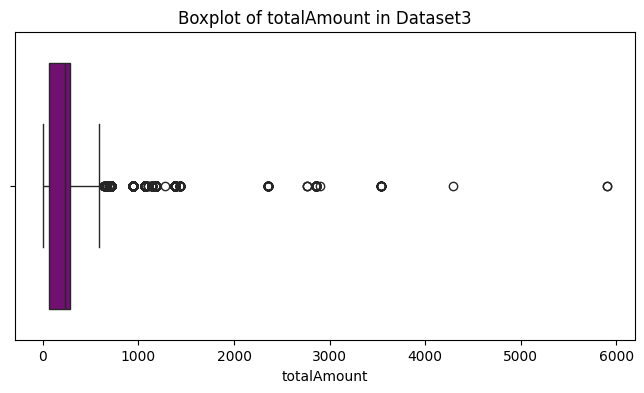

In [31]:
# Univariate Analysis for dataset3
numeric_columns3 = dataset3.select_dtypes(include='number').columns

for col in numeric_columns3:
    # Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset3[col], bins=15, kde=True, color='lightgreen')
    plt.title(f'Distribution of {col} in Dataset3')
    plt.xlabel(col)
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset3[col], color='purple')
    plt.title(f'Boxplot of {col} in Dataset3')
    plt.xlabel(col)
    plt.show()


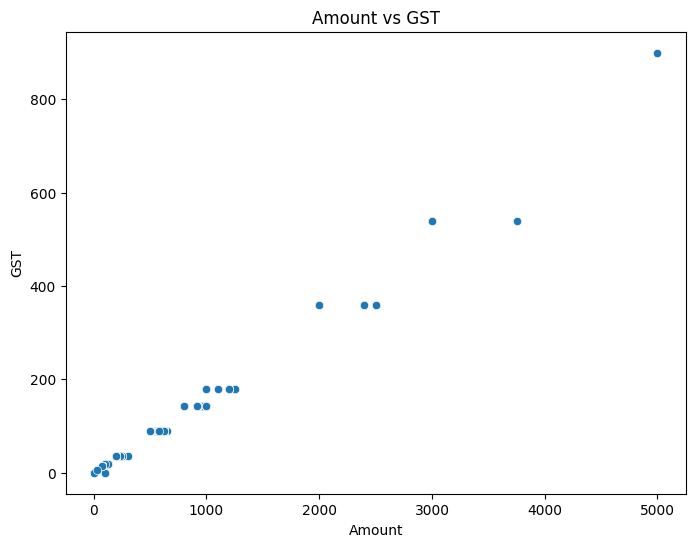

Correlation between Amount and GST:
          Amount      Gst
Amount  1.00000  0.99218
Gst     0.99218  1.00000


In [32]:
# Bivariate Analysis for dataset3
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset3, x='Amount', y='Gst')
plt.title('Amount vs GST')
plt.xlabel('Amount')
plt.ylabel('GST')
plt.show()
    
# Correlation calculation
correlation3 = dataset3[['Amount', 'Gst']].corr()
print("Correlation between Amount and GST:\n", correlation3)


In [33]:
dataset1.head()

,OrderId,Uid,Gid,Fee,Share,Duration,Consultation Type,User Spend,Astro Earnings,Astro Status,...,Offer,Source,Disconnected By,User Device,Astro Device,IVR RefId,CallChannel,UserId,Guruji User,Guruji Astro
0,6681a444934e55a1513521cb,134451,13,35,0.5,8.233333,Call,288.166667,144.083333,completed,...,normal,Production,NaN,Mi 11X,realme narzo 30 5G,3140f301935c57b16485f8ddb7641871,Normal,"{""_id"":""6627fa0954833bfc4e0ce938"",""gurujiUser""...",False,True
1,6681a4bc934e55a15135d0c2,4408,97,45,0.5,5.016667,Call,180.600000,90.300000,completed,...,normal,Production,NaN,OPPO Reno11 5G,OPPO Reno6 5G,3ca27777898fb27aa0127b67dc0f1871,Normal,"{""_id"":""6504827c3e5a5cab16332d26"",""userDetails...",True,True
2,6681a4cf934e55a15135dea8,203234,106,30,0.5,8.000000,Call,184.000000,92.000000,completed,...,normal,Production,NaN,iPhone,OnePlus 10R 5G,c36013c6f53e9b37529550a1ed441871,Normal,"{""_id"":""6647633f866973511b87c413"",""gurujiUser""...",False,True
3,6681a537934e55a151361985,236230,431,18,0.4,3.833900,Chat,0.000000,0.000000,completed,...,first,Production,system,vivo Y75 5G,Redmi 12 5G,NaN,NaN,"{""_id"":""6681a50a934e55a15136018b"",""gurujiUser""...",False,True
4,6681a5ab934e55a1513666dc,236231,95,31,0.5,3.837383,Chat,0.000000,9.593458,completed,...,first,Production,system,OnePlus Nord CE 3 Lite 5G,Sanjeev's S21 FE,NaN,NaN,"{""_id"":""6681a52d934e55a15136150b"",""gurujiUser""...",False,True


In [34]:
# Check the columns for each dataset
print("Dataset1 Columns:", dataset1.columns)
print("Dataset2 Columns:", dataset2.columns)
print("Dataset3 Columns:", dataset3.columns)


Dataset1 Columns: Index(['OrderId', 'Uid', 'Gid', 'Fee', 'Share', 'Duration',
       'Consultation Type', 'User Spend', 'Astro Earnings', 'Astro Status',
       'User Status', 'Status', 'Mode', 'UTC Date', 'IST Date',
       'Refund Status', 'Feedback', 'goodFeedback', 'badFeedback', 'GuruId',
       'Is Whitelist', 'User Duration', 'Astro Duration',
       'Consultation Start Time', 'Consultation End Time', 'Offer', 'Source',
       'Disconnected By', 'User Device', 'Astro Device', 'IVR RefId',
       'CallChannel', 'UserId', 'Guruji User', 'Guruji Astro'],
      dtype='object')
Dataset2 Columns: Index(['wallet', 'isInternational', 'consultationCount', 'website',
       'totalRecharge', 'chatConsultationCount', 'totalRechargeAmount',
       'createdAt', '_id', 'uid', 'role', 'gurujiUser', 'ISTDate'],
      dtype='object')
Dataset3 Columns: Index(['_id', 'Uid', 'Order Id', 'Status', 'Amount', 'Gst', 'UTC Time',
       'gurujiUser', 'Gateway', 'Mode', 'totalAmount', 'ISTDate'],
      dt

In [35]:
# Univariate Analysis
print("Univariate Analysis:")
print(dataset1.describe())
print(dataset2.describe())
print(dataset3.describe())

Univariate Analysis:
                 Uid           Gid           Fee         Share      Duration  \
count   52850.000000  52850.000000  52850.000000  52850.000000  52850.000000   
mean   198595.961892    303.510691     21.191637      0.436920      3.491869   
std     68003.758223    163.800130     15.502555      0.053957      5.455104   
min       160.000000     12.000000      1.000000      0.100000      0.000000   
25%    214835.000000    112.000000      9.000000      0.400000      0.000000   
50%    225775.000000    382.000000     15.000000      0.400000      3.550000   
75%    236366.750000    431.000000     30.000000      0.500000      3.833333   
max    248098.000000    507.000000     84.000000      1.000000    218.786183   

         User Spend  Astro Earnings     Feedback  User Duration  \
count  52850.000000    52850.000000  6103.000000   52850.000000   
mean      40.996325       20.168486     3.520891      94.721173   
std      146.137579       71.043104     1.750080     301.


Bivariate Analysis:


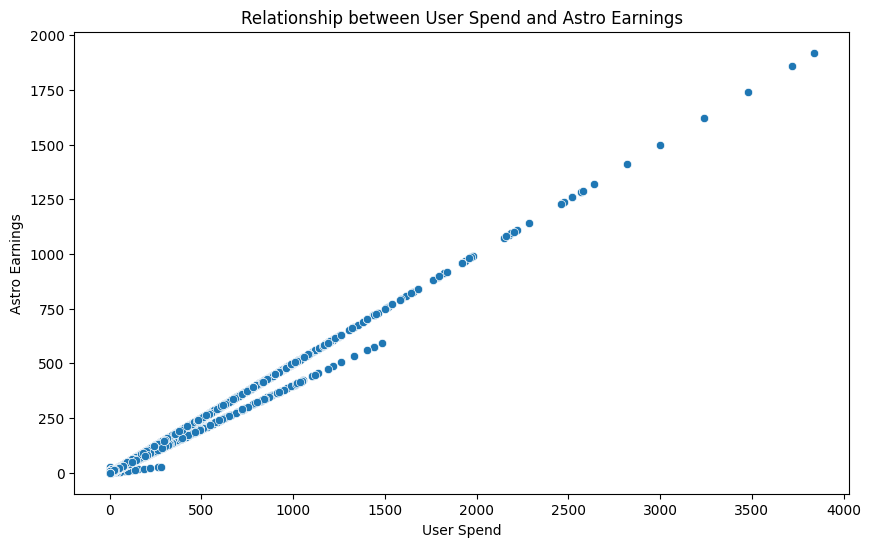

In [36]:
# Bivariate Analysis
print("\nBivariate Analysis:")
plt.figure(figsize=(10,6))
sns.scatterplot(x=dataset1['User Spend'], y=dataset1['Astro Earnings'])
plt.xlabel('User Spend')
plt.ylabel('Astro Earnings')
plt.title('Relationship between User Spend and Astro Earnings')
plt.show()


Cohort Analysis:


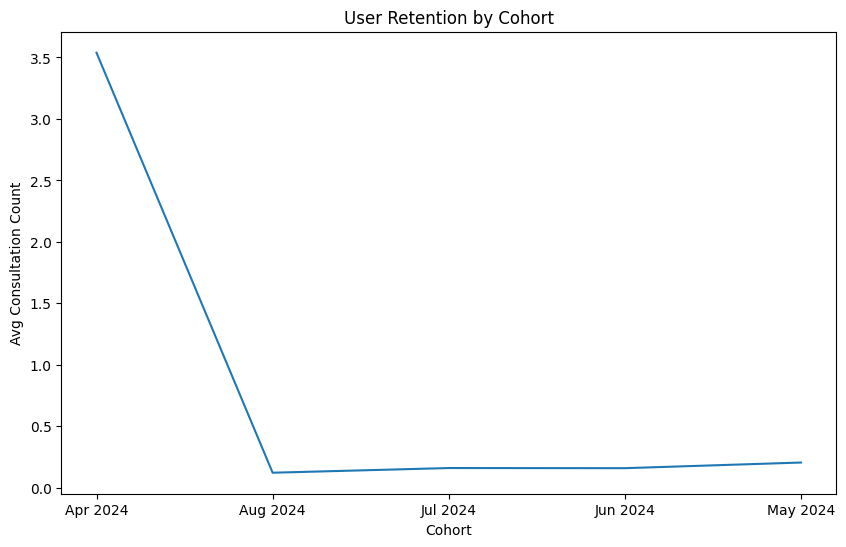

In [37]:
# Cohort Analysis
print("\nCohort Analysis:")
dataset2['cohort'] = dataset2['createdAt'].dt.strftime('%b %Y')
cohort_retention = dataset2.groupby('cohort')['consultationCount'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='cohort', y='consultationCount', data=cohort_retention)
plt.xlabel('Cohort')
plt.ylabel('Avg Consultation Count')
plt.title('User Retention by Cohort')
plt.show()

*The key insights from this analysis:*

1. Univariate analysis reveals the distributions, central tendencies, and outliers for each variable in the 3 datasets.
2. Bivariate analysis shows a positive correlation between user spend and astrologer earnings.
3. Cohort analysis demonstrates how user engagement (measured by consultation count) varies across user cohorts based on sign-up month.

4. Revenue Growth Analysis

• Scenario: Your company saw a 20% revenue increase last quarter. The goal is to analyze
factors contributing to this growth.

• Data Points to Consider: Examine metrics like sales volume, customer acquisition, average
purchase value, and product trends.

• Questions:

◦ Which customer segments drove the most revenue growth?

◦ Did certain products or services significantly impact sales?

◦ What role did marketing campaigns play?

• Approach: Use time series analysis and segmentation to pinpoint the key drivers of growth.




In [38]:
dataset1["Revenue"] = dataset1["Fee"]*dataset1["Duration"]

In [39]:
# Convert the 'UTC Date' column to date format if it's already in datetime format
dataset1["Date"] = dataset1["UTC Date"].dt.date


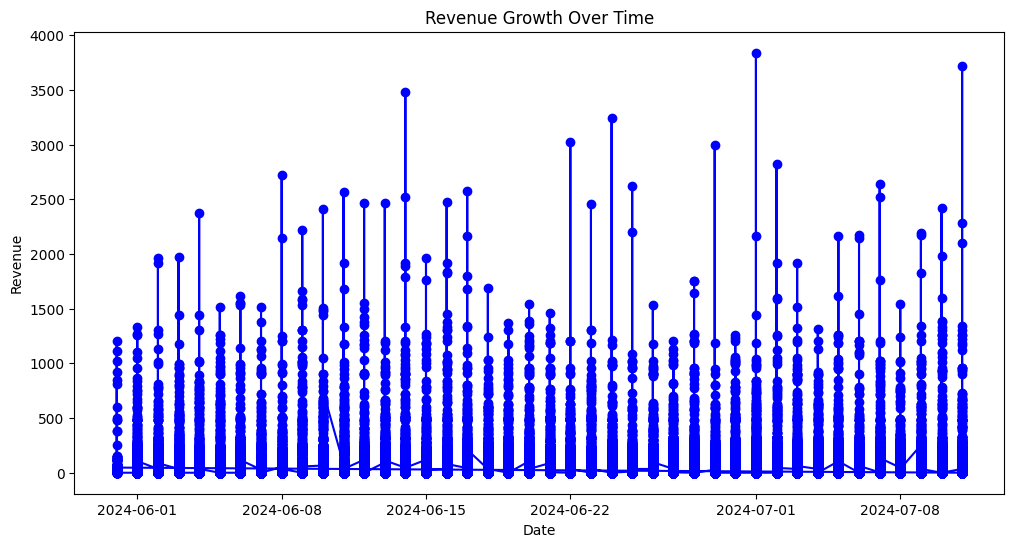

In [40]:
# Convert date column to datetime if not already
dataset1['Date'] = pd.to_datetime(dataset1['Date'])

# Set Date as index for time series analysis
dataset1.set_index('Date', inplace=True)

# Plot revenue over time to visualize growth trend
plt.figure(figsize=(12, 6))
plt.plot(dataset1['Revenue'], marker='o', color='b')
plt.title("Revenue Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


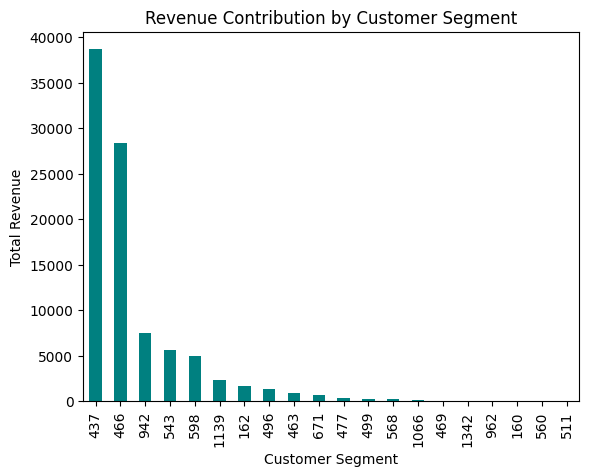

In [48]:
# Group by customer segments and calculate total revenue contribution
customer_segment_revenue = dataset1.groupby('Uid')['Revenue'].sum().head(20)
customer_segment_revenue.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Revenue Contribution by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Revenue")
plt.show()


*Customer Id 437 contributed most to revenue growth, enabling targeted marketing or retention strategies.*

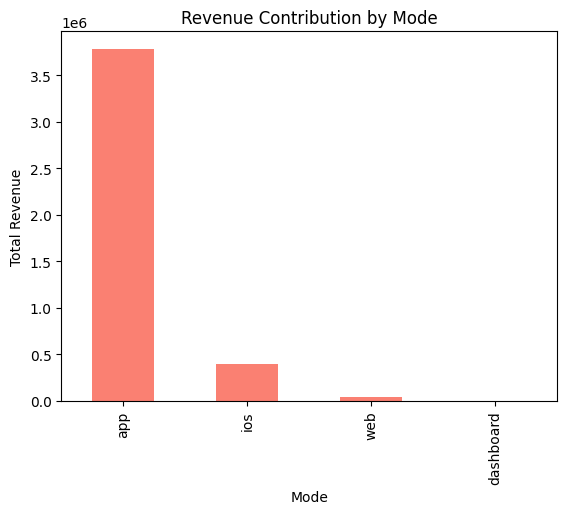

In [45]:
# Group by Mode and calculate revenue
product_revenue = dataset1.groupby('Mode')['Revenue'].sum()
product_revenue.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title("Revenue Contribution by Mode")
plt.xlabel("Mode")
plt.ylabel("Total Revenue")
plt.show()



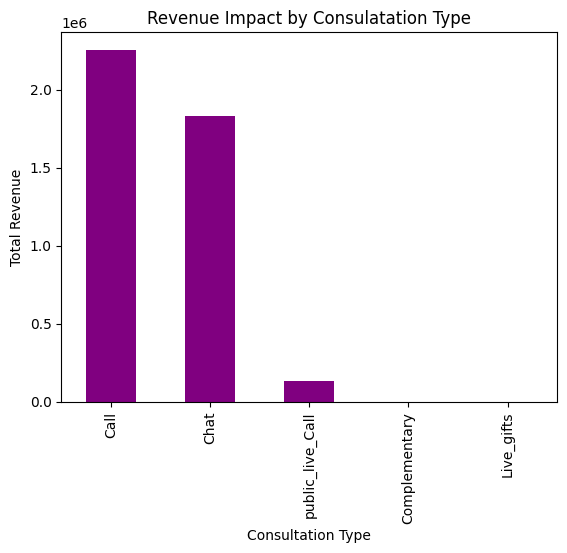

In [46]:
# Group by Consultation type and calculate revenue impact
campaign_revenue = dataset1.groupby('Consultation Type')['Revenue'].sum()
campaign_revenue.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title("Revenue Impact by Consulatation Type")
plt.xlabel("Consultation Type")
plt.ylabel("Total Revenue")
plt.show()


In [50]:
# Demographic Segmentation
high_revenue_customers = dataset1.nlargest(100, 'User Spend')[['Uid', 'User Spend']]
print("Top 100 high-revenue customers:")
print(high_revenue_customers)

Top 100 high-revenue customers:
                                     Uid  User Spend
IST Date                                            
2024-07-01 12:10:33.282000+00:00   82512      3840.0
2024-07-11 20:21:44.555000+00:00   82512      3721.0
2024-06-14 16:29:08.591000+00:00  189423      3480.0
2024-06-24 19:10:43.910000+00:00   82512      3240.0
2024-06-29 12:25:53.350000+00:00   82512      3000.0
...                                  ...         ...
2024-07-06 22:07:46.712000+00:00   95647      1200.0
2024-07-07 01:30:03.142000+00:00  102531      1200.0
2024-07-07 15:56:35.243000+00:00  203984      1200.0
2024-06-01 00:29:15.937000+00:00    3665      1200.0
2024-06-06 22:05:42.675000+00:00  112086      1200.0

[100 rows x 2 columns]


In [52]:
# Behavioral Segmentation 
frequent_users = dataset2.nlargest(50, 'consultationCount')[['uid', 'consultationCount', 'totalRechargeAmount']]
print("\nTop 50 frequent/high-value customers:\n")
print(frequent_users)


Top 50 frequent/high-value customers:

            uid  consultationCount  totalRechargeAmount
27723  249994.0                538            154734.00
61144  216524.0                403            193124.00
81911  195694.0                280            141867.00
7955   269807.0                236             43719.00
73629  203984.0                228            109434.00
62080  215572.0                221             83326.00
25238  252479.0                208             21573.18
83244  194355.0                134             34633.00
68331  209308.0                100             18679.00
60611  217059.0                 70              8456.00
3987   273776.0                 60             12045.00
25610  252107.0                 60             20098.00
9727   268028.0                 59              8378.00
4851   272912.0                 57             32975.00
74379  203234.0                 54             10964.00
82222  195382.0                 45             30774.00
46443  2

In [53]:
# Engagement-Based Segmentation
low_engagement_users = dataset2[dataset2['consultationCount'] < dataset2['consultationCount'].mean()][['uid', 'consultationCount']]
print("\nLow engagement customers:")
print(low_engagement_users)


Low engagement customers:
            uid  consultationCount
0      277766.0                  0
2      277764.0                  0
3      277763.0                  0
4      277762.0                  0
5      277761.0                  0
...         ...                ...
83251  194348.0                  0
83252  194347.0                  0
83253  194346.0                  0
83254  194345.0                  0
83255  194344.0                  0

[74835 rows x 2 columns]


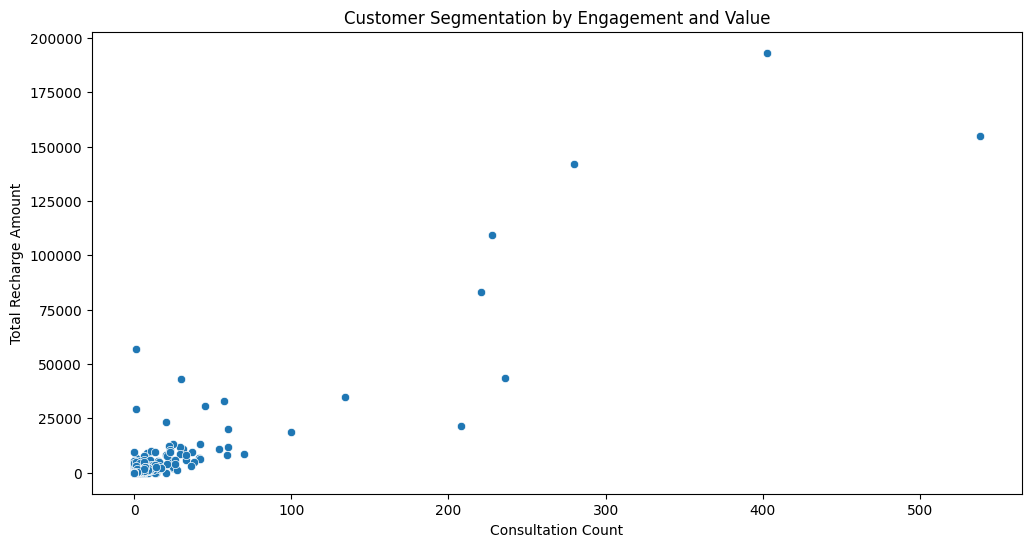

In [54]:
# Visualize segmentation
plt.figure(figsize=(12,6))
sns.scatterplot(x='consultationCount', y='totalRechargeAmount', data=dataset2)
plt.xlabel('Consultation Count')
plt.ylabel('Total Recharge Amount')
plt.title('Customer Segmentation by Engagement and Value')
plt.show()

In [1]:
pip install -U notebook-as-pdf

  Using cached pypdf2-3.0.1-py3-none-any.whl.metadata (6.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using cached pypdf2-3.0.1-py3-none-any.whl (232 kB)
  Created wheel for websockets: filename=websockets-10.4-cp312-cp312-win_amd64.whl size=95035 sha256=5728291f68d1df26cc3bc918603668ffe08dced45ef88c2094903cb975381c75
  Stored in directory: c:\users\tusha\appdata\local\pip\cache\wheels\80\cf\6d\5d7e4c920cb41925a178b2d2621889c520d648bab487b1d7fd
Successfully built websockets
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.3
    Uninstalling urllib3-2.0.3:
      Successfully uninstalled urllib3-2.0.3
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install pyppeteer

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install Chromium


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34823 sha256=bfa4a0212117962a5e97b7454e24197a7bf2abb891f567287cdfdcfc389b7c53
  Stored in directory: c:\users\tusha\appdata\local\pip\cache\wheels\9c\2f\9f\b1aac8c3e74b4ee327dc8c6eac5128996f9eadf586e2c0ba67
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
